# Project 1: SAT & ACT Analysis

## Problem Statement
This project will look at the 2017 & 2018 SAT and ACT data to explore the relationship between the data. At the end of the project, I will use the insights obtained to recommend suggestions on how to improve the SAT participation rate for a state that has relatively low participation rate.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
sat17.shape

(51, 5)

In [5]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
act17.shape

(52, 7)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### Answer: 
The data are the **state mean scores** for the SAT and ACT tests in the US for 2017. 

For the **SAT 2017** data, there are 5 columns, they contain the following information:
1. The name of the state
2. The participation rate of the state
3. The mean score for Evidence-Based Reading and Writing of the state
4. The mean score for Math of the state
5. The mean total score for the state
There are 51 rows, 1 row for each state.


For the **ACT 2017** data, there are 7 columns, they contain the following innformation:
1. The name of the state
2. The participation rate of the state
3. The mean score for English of the state
4. The mean score for Math of the state
5. The mean score for Reading of the state
6. The mean score for science of the state
7. The mean Composite score for the state
There are a total of 52 rows in the ACT 2017 data as it contain 1 additional row of data for the **national average**.



#### 4a. Does the data look complete? 

#### Answer: 
The **SAT 2017** data does not contain information on the **national average**. 

Other than that, there is no null value present in the data and the data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer:
For SAT score, the **minimum and maximum for both Math and EBRW are 200 and 800**. Hence, the minimum and maximum score for SAT score are 400 and 1600 respectively.

For ACT score, the **minimum and maximum for all 4 sections are 1 and 36**. Hence, the minimum and maximum score for the composite score (which is the mean of all 4 sections) are 1 and 36 as well.

There are **errors for Maryland's result** in both SAT 2017 and ACT 2017. In SAT 2017, the **Math value is 52**, which is lower than the minimum. In ACT 2017, the **Sci value is 2.3** which is an anomaly.

Referring back to the sources, **Maryland's mean score for Math for SAT 2017 is 524**. And the **Maryland's mean score for Science for ACT 2017 is 23.2**.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
#code
sat17.loc[20,'Math'] = 524
act17.loc[21,'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:
Both Participation columns are object type, but this information will be useful as numbers (int datatype). The composite column for ACT 2017 is also an object type but should be changed to float type as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#code
sat17['Participation'] = sat17.Participation.map(lambda x: int(x.split('%')[0])/100)
act17['Participation'] = act17.Participation.map(lambda x: int(x.split('%')[0])/100)

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
#code
act17.loc[51, 'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
#code
act17['Composite'] = act17['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [13]:
#Code:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [14]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#code
#Creates a function that lowercase the header, replace space with _ for easy referencing and add either a phrase (i.e. sat17) to denote which year and test
def column_name_cleaner(df, phrase_to_add):
    
    #lowercase characters and replace spaces with _
    column_name_dict = {column: column.lower().replace(' ', '_')+'_'+phrase_to_add for column in df.columns}
    return column_name_dict

act17.rename(columns = column_name_cleaner(act17, "act17"), inplace=True)
sat17.rename(columns = column_name_cleaner(sat17, "sat17"), inplace=True)

In [16]:
#Change some column header to desired values
sat17.rename(columns={
    'state_sat17': 'state',
    'evidence-based_reading_and_writing_sat17': 'ebrw_sat17'
}, inplace=True)

act17.rename(columns={
    'state_act17': 'state'
}, inplace=True)

In [17]:
sat17.head(1)

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17
0,Alabama,0.05,593,572,1165


In [18]:
act17.head(1)

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,National,0.6,20.3,20.7,21.4,21.0,21.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### Answer:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT|State Participating in Test| 
|participation_sat17|float|SAT|Participation Rate of the State for SAT 2017| 
|mebrw_sat17|int|SAT|Mean Score for Evidence-based Reading and Writing of the State for SAT 2017| 
|math_sat17|int|SAT|Mean Score for Math of the State for SAT 2017| 
|total_sat17|int|SAT|Mean Total SAT Score for the State for SAT 2017| 
|participation_act17|float|ACT|Participation Rate of the State for ACT 2017| 
|english_act17|float|ACT|Mean Score for English of the State for ACT 2017| 
|math_act17|float|ACT|Mean Score for Math of the State for ACT 2017| 
|reading_act17|float|ACT|Mean Score for Reading of the State for ACT 2017| 
|science_act17|float|ACT|Mean Score for Science of the State for ACT 2017| 
|composite_act17|float|ACT|Mean Composite Score of the State for ACT 2017| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
#code
act17.drop(0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [20]:
#Code:
merged_17 = pd.merge(sat17,
                     act17,
                     how = 'inner',
                     on = 'state')

merged_17.head()

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
#code
merged_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
sat18 = pd.read_csv('../data/sat_2018.csv')
act18 = pd.read_csv('../data/act_2018_updated.csv')

In [23]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [24]:
#Check the datatype and if there are any null values
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [25]:
#Rename the columns so that it follows the same convention as previously used
sat18_headers = {
    'State':'state',
    'Participation': 'participation_sat18',
    'Evidence-Based Reading and Writing': 'ebrw_sat18', 
    'Math': 'math_sat18',
    'Total': 'total_sat18'
}

sat18.rename(columns = sat18_headers, inplace=True)

sat18.head()

,state,participation_sat18,ebrw_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [26]:
#Change the participation rate from a string to a float between 0 and 1
sat18.participation_sat18 = sat18.participation_sat18.apply(lambda x: int(x.replace('%',''))/100)
sat18.head()

,state,participation_sat18,ebrw_sat18,math_sat18,total_sat18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [27]:
#Check if the suummation of ebrw and math is equal to total
sat18_difference = sat18.total_sat18 - sat18.ebrw_sat18 - sat18.math_sat18
for index, value in enumerate(sat18_difference):
    if 0 < abs(value):
        print(f'The {index} row has a difference of {value}')

The 3 row has a difference of 1
The 6 row has a difference of -1
The 7 row has a difference of 1
The 16 row has a difference of 1
The 22 row has a difference of 1
The 31 row has a difference of 1
The 33 row has a difference of 1
The 45 row has a difference of 1
The 50 row has a difference of -1


The differences of 1 or -1 are likely due to rounding errors and should be no course for concern

In [88]:
#After looking through the data and comparing to other online sources, a few datapoints are found to have the wrong values.
#The following code is to correct the values that are wrong
sat18.loc[sat18['state'] == 'Florida', 'participation_sat18'] = 0.97
sat18.loc[sat18['state'] == 'Florida', 'ebrw_sat18'] = 522
sat18.loc[sat18['state'] == 'Florida', 'math_sat18'] = 493
sat18.loc[sat18['state'] == 'Florida', 'total_sat18'] = 1014
sat18.loc[sat18['state'] == 'Hawaii', 'ebrw_sat18'] = 550
sat18.loc[sat18['state'] == 'Hawaii', 'math_sat18'] = 549
sat18.loc[sat18['state'] == 'Hawaii', 'total_sat18'] = 1099
sat18.loc[sat18['state'] == 'Utah', 'ebrw_sat18'] = 618
sat18.loc[sat18['state'] == 'Utah', 'math_sat18'] = 612
sat18.loc[sat18['state'] == 'Utah', 'total_sat18'] = 1230
sat18

,state,participation_sat18,ebrw_sat18,math_sat18,total_sat18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
8,District of Columbia,0.92,497,480,977
9,Florida,0.97,522,493,1014


In [29]:
act18.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [30]:
#Check the datatype and if there are any null values
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [31]:
#Rename the columns so that it follows the same convention as previously used
act18_header = {
    'State': 'state',
    'Percentage of Students Tested': 'participation_act18',
    'Average Composite Score': 'composite_act18',
    'Average English Score': 'english_act18',
    'Average Math Score': 'math_act18',
    'Average Reading Score': 'reading_act18',
    'Average Science Score': 'science_act18'
}

act18.rename(columns = act18_header, inplace = True)
act18.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [32]:
#Change the participation rate from a string to a float between 0 and 1
act18.participation_act18 = act18.participation_act18.apply(lambda x: x/100)
act18.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [33]:
#Check if the mean of the 4 sections is equal to composite
calculated_composite = act18.apply(lambda x: np.mean(x[3:]), axis = 1)

act18_difference = act18.composite_act18 - calculated_composite

for index, value in enumerate(act18_difference):
    if 0.1 < abs(value):
        print(f'The {index} row has a difference of {value}')

The 0 row has a difference of 0.14999999999999858
The 1 row has a difference of 0.125
The 2 row has a difference of 0.125
The 3 row has a difference of 0.125
The 4 row has a difference of 0.1750000000000007
The 5 row has a difference of 0.14999999999999858
The 6 row has a difference of 0.14999999999999858
The 7 row has a difference of -0.47499999999999787
The 8 row has a difference of 0.15000000000000213
The 9 row has a difference of 0.125
The 10 row has a difference of 0.3500000000000014
The 13 row has a difference of 0.125
The 14 row has a difference of 0.12499999999999645
The 15 row has a difference of 0.125
The 16 row has a difference of 0.125
The 18 row has a difference of 0.14999999999999858
The 19 row has a difference of 0.125
The 20 row has a difference of 0.14999999999999858
The 21 row has a difference of 0.1750000000000007
The 22 row has a difference of 0.14999999999999858
The 23 row has a difference of 0.12500000000000355
The 24 row has a difference of 0.15000000000000213
Th

Except from Row 7, the rest of the difference in score is less than 0.2. This is likely due to rounding error.

In [89]:
#Checking the values for row 7 with the bigger difference in given vs calculated composite score
act18.iloc[7]

state                  Delaware
participation_act18        0.17
composite_act18            23.8
english_act18              23.7
math_act18                 23.1
reading_act18              24.5
science_act18              23.4
Name: 7, dtype: object

Checking the value for row 7 (delaware) against the website (https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf), the composite score should be 23.8. This will be closer to a mean found from the other 4 values of 23.7.

In [35]:
act18.loc[7,'composite_act18'] = 23.8

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [36]:
merged_18 = pd.merge(sat18,
                     act18,
                     how = 'inner',
                     on = 'state')

merged_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   participation_sat18  51 non-null     float64
 2   ebrw_sat18           51 non-null     int64  
 3   math_sat18           51 non-null     int64  
 4   total_sat18          51 non-null     int64  
 5   participation_act18  51 non-null     float64
 6   composite_act18      51 non-null     float64
 7   english_act18        51 non-null     float64
 8   math_act18           51 non-null     float64
 9   reading_act18        51 non-null     float64
 10  science_act18        51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [37]:
merged_17_18 = pd.merge(merged_17,
                     merged_18,
                     how = 'inner',
                     on = 'state')

merged_17_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   participation_sat17  51 non-null     float64
 2   ebrw_sat17           51 non-null     int64  
 3   math_sat17           51 non-null     int64  
 4   total_sat17          51 non-null     int64  
 5   participation_act17  51 non-null     float64
 6   english_act17        51 non-null     float64
 7   math_act17           51 non-null     float64
 8   reading_act17        51 non-null     float64
 9   science_act17        51 non-null     float64
 10  composite_act17      51 non-null     float64
 11  participation_sat18  51 non-null     float64
 12  ebrw_sat18           51 non-null     int64  
 13  math_sat18           51 non-null     int64  
 14  total_sat18          51 non-null     int64  
 15  participation_act18  51 non-null     float

In [38]:
merged_18.to_csv('../data/combined_2018.csv')
merged_17_18.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [39]:
#Code:
final = merged_17_18.copy()
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
ebrw_sat17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_act17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act17,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act17,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act17,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act17,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
composite_act17,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [40]:
#code
def standard_deviation(series):
    
    series_mean = series.mean()
    summation = 0.0
    
    for value in series:
        summation += (value - series_mean)**2
    
    return round((summation/len(series))**0.5, 6)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [41]:
sd = {column_name: standard_deviation(final[column_name]) for column_name in final.columns[1:]}
view_sd = pd.Series(sd)
view_sd

participation_sat17     0.349291
ebrw_sat17             45.216970
math_sat17             46.657134
total_sat17            91.583511
participation_act17     0.318242
english_act17           2.330488
math_act17              1.962462
reading_act17           2.046903
science_act17           1.722216
composite_act17         2.000786
participation_sat18     0.376013
ebrw_sat18             44.911815
math_sat18             48.467352
total_sat18            93.031974
participation_act18     0.337452
composite_act18         2.096822
english_act18           2.422254
math_act18              2.015707
reading_act18           2.145892
science_act18           1.851689
dtype: float64

In [42]:
#Code:
np.std(final)

participation_sat17     0.349291
ebrw_sat17             45.216970
math_sat17             46.657134
total_sat17            91.583511
participation_act17     0.318242
english_act17           2.330488
math_act17              1.962462
reading_act17           2.046903
science_act17           1.722216
composite_act17         2.000786
participation_sat18     0.376013
ebrw_sat18             44.911815
math_sat18             48.467352
total_sat18            93.031974
participation_act18     0.337452
composite_act18         2.096822
english_act18           2.422254
math_act18              2.015707
reading_act18           2.145892
science_act18           1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### Answer: 
The **manually calculated standard deviation matches up with the ouput from numpy's std method**, but is different from the output from pandas describe method. 

The reason for the difference is because, by default, Pandas  uses Bessel's correction, which uses N-1 as denominator instead of N as stated in the formula.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [43]:
#As we will be looking through a number of dataframes, the following function will help to repeat the repetitive process printing the dataframes.
def display_highest_lowest_stats(test_year, disp_row=5, df=final):
    
    #Based on the tag test_year (i.e "sat17") given, the cols_to_sort will return the participation rate and the total/composite score for that test & year.    
    cols_to_sort = [column for column in df.columns if (test_year in column and column.split('_')[0] in ['participation', 'total', 'composite'])]
    
    #The following loop will display the top and bottom disp_row (default = 5 numbers) of rows for the column.
    for column_header in cols_to_sort:
        print(f'States with lowest values for {column_header} are:')
        display(df[['state',column_header]].sort_values(column_header).head(disp_row))
        print('--------------------------------------------------------------------\n')
        print(f'States with highest values for {column_header} are:')
        display(df[['state',column_header]].sort_values(column_header, ascending=False).head(disp_row))
        print('--------------------------------------------------------------------\n')

### Highest & Lowest Participation Rate and Mean Total Score for 2017 SAT

In [44]:
display_highest_lowest_stats('sat17')

States with lowest values for participation_sat17 are:


,state,participation_sat17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


--------------------------------------------------------------------

States with highest values for participation_sat17 are:


,state,participation_sat17
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


--------------------------------------------------------------------

States with lowest values for total_sat17 are:


,state,total_sat17
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


--------------------------------------------------------------------

States with highest values for total_sat17 are:


,state,total_sat17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


--------------------------------------------------------------------



#### Obeservations:
Looking at the 2017 SAT data, it seems to suggest that **the states with high participation rate seem to have lower total mean scores** (i.e. Michigan and Delaware both have 100% participation and they have the 4th and 2nd lowest total score). 

On the other spectrum,  it also seem to suggest that **the states with low participation rate seem to have higher total mean scores** (i.e. Iowa and Missouri have the lowest and second lowest participation rates and they have the 3rd and 4th highest total score).

### Highest & Lowest Participation Rate and Mean Total Score for 2018 SAT

In [45]:
display_highest_lowest_stats('sat18')

States with lowest values for participation_sat18 are:


,state,participation_sat18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


--------------------------------------------------------------------

States with highest values for participation_sat18 are:


,state,participation_sat18
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


--------------------------------------------------------------------

States with lowest values for total_sat18 are:


,state,total_sat18
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011


--------------------------------------------------------------------

States with highest values for total_sat18 are:


,state,total_sat18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


--------------------------------------------------------------------



#### Obeservations:
Looking at the 2018 SAT data, it shows similar trend as SAT17. 

The **states with high participation rate seem to have lower total mean scores** (i.e. Delaware (again) and Idaho both have 100% participation and they have the 2nd and 4th lowest total score). 

Similarly, it suggests that **the states with low participation rate seem to have higher total mean scores** (i.e. North Dakota and Wiscconsin have the lowest and second lowest participation rates and they have the 3rd and 2nd highest total score).

### Highest & Lowest Participation Rate and Mean Total Score for 2017 ACT

In [46]:
display_highest_lowest_stats('act17',15)

States with lowest values for participation_act17 are:


,state,participation_act17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


--------------------------------------------------------------------

States with highest values for participation_act17 are:


,state,participation_act17
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


--------------------------------------------------------------------

States with lowest values for composite_act17 are:


,state,composite_act17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


--------------------------------------------------------------------

States with highest values for composite_act17 are:


,state,composite_act17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


--------------------------------------------------------------------



Please find observation below with 2018 ACT observations.

### Highest & Lowest Participation Rate and Mean Total Score for 2018 ACT

In [47]:
display_highest_lowest_stats('act18',15)

States with lowest values for participation_act18 are:


,state,participation_act18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


--------------------------------------------------------------------

States with highest values for participation_act18 are:


,state,participation_act18
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0


--------------------------------------------------------------------

States with lowest values for composite_act18 are:


,state,composite_act18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


--------------------------------------------------------------------

States with highest values for composite_act18 are:


,state,composite_act18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
13,Illinois,23.9
5,Colorado,23.9


--------------------------------------------------------------------



#### Observations
Looking at the 2017 and 2018 ACT data, they suggest a similar trend to the SAT results as well - **states with higher participation rates generally have a lower composite score and vice versa**. 

This would make sense as states with 100% or close to 100% participation rate, probably has **policy that encourages or mandates one of the two tests as the standard admission test** for its student population. As a result of this, a huge percentage of the student population leaving middle school will take the exam, **including students from all performance level (good and bad), resulting in a lower mean**. 

On the other hand, for the test that is not the **state's standard admission test**, if a student chooses to take the test **voluntarily**, it may be because **the student has personal reasons to take the test** (i.e. to apply to a certain (more prestigious) college that require that test) and **may be better students and more likely to study hard for it, resulting in a higher mean score**.

\
However, it is also worth nothing here that in general, the **participation rate for ACT higher than SAT**:
1. There are a **larger number of states with 100% participation rates for ACT** (around 17) compared to SAT (around 5).
2. The **lowest participation rates for ACT are much higher than SAT** (mostly more than 15% for ACT compared to many states around 3% for SAT).

*This is with the excception of Maine which has a much lower ACT participation rate of 8% in 2017 and 7% in 2018.

### States with 100% participation on SAT test, but have a rate change year-to-year

In [48]:
# Display any states with 100% participation on a given SAT test but have a rate change year-to-year
display(final[(final['participation_sat17'] == 1) & (final['participation_sat18'] != 1)][['state','participation_sat17', 'total_sat17','participation_sat18', 'total_sat18']])
display(final[(final['participation_sat17'] != 1) & (final['participation_sat18'] == 1)][['state','participation_sat17', 'total_sat17','participation_sat18', 'total_sat18']])

,state,participation_sat17,total_sat17,participation_sat18,total_sat18
8,District of Columbia,1.0,950,0.92,977


,state,participation_sat17,total_sat17,participation_sat18,total_sat18
5,Colorado,0.11,1201,1.0,1025
12,Idaho,0.93,1005,1.0,1001


In [49]:
final[abs(final['participation_sat17'] - final['participation_sat18']) > 0.5][['state','participation_sat17', 'total_sat17','participation_sat18', 'total_sat18']]

,state,participation_sat17,total_sat17,participation_sat18,total_sat18
5,Colorado,0.11,1201,1.00,1025
13,Illinois,0.09,1115,0.99,1019


### States with 100% participation on ACT test, but have a rate change year-to-year

In [50]:
# Display any states with 100% participation on a given ACT test but have a rate change year-to-year
display(final[(final['participation_act17'] == 1) & (final['participation_act18'] != 1)][['state','participation_act17', 'composite_act17','participation_act18', 'composite_act18']])
display(final[(final['participation_act17'] != 1) & (final['participation_act18'] == 1)][['state','participation_act17', 'composite_act17','participation_act18', 'composite_act18']])

,state,participation_act17,composite_act17,participation_act18,composite_act18
5,Colorado,1.0,20.8,0.30,23.9
23,Minnesota,1.0,21.5,0.99,21.3


,state,participation_act17,composite_act17,participation_act18,composite_act18
27,Nebraska,0.84,21.4,1.0,20.1
35,Ohio,0.75,22.0,1.0,20.3


In [51]:
final[abs(final['participation_act17'] - final['participation_act18']) >= 0.5][['state','participation_act17', 'composite_act17','participation_act18', 'composite_act18']]

,state,participation_act17,composite_act17,participation_act18,composite_act18
5,Colorado,1.00,20.8,0.30,23.9
13,Illinois,0.93,21.4,0.43,23.9


#### Observations
**Colorado** had huge changes in their participation rates in 2017 and 2018, **shifted from ACT to SAT**. Their ACT participation rate dropped form 100% in 2017 to 30% in 2018. On the other hand, their SAT participation rate inreased from 11% in 2017 to 100% in 2018. 

Apart from Colorado, **Illinois** has huge changes in their participation rate in 2017 and 2018 as well, **shifting from ACT to SAT**. Their SAT Participation rate increased from 9% to 99% while their ACT Participation Rate decreased from 93% to 43%.

For **Nebraska and Ohio, it is observed that as their participation rate increased, their composite score dropped.** This similarly suggests that as participation rate increase, the mean score achieved will fall.

### States with >50% participation on both tests in either year

In [52]:
display(final.loc[(final['participation_act17'] > 0.5) & (final['participation_sat17'] > 0.5),['state', 'participation_sat17', 'total_sat17', 'participation_act17', 'composite_act17']])
display(final.loc[(final['participation_act18'] > 0.5) & (final['participation_sat18'] > 0.5), ['state', 'participation_sat18', 'total_sat18', 'participation_act18', 'composite_act18']])

,state,participation_sat17,total_sat17,participation_act17,composite_act17
9,Florida,0.83,1017,0.73,19.8
10,Georgia,0.61,1050,0.55,21.4
11,Hawaii,0.55,1085,0.90,19.0


,state,participation_sat18,total_sat18,participation_act18,composite_act18
9,Florida,0.97,1014,0.66,19.9
10,Georgia,0.70,1064,0.53,21.4
11,Hawaii,0.56,1099,0.89,18.9
33,North Carolina,0.52,1098,1.00,19.1
40,South Carolina,0.55,1070,1.00,18.3


In [53]:
display(final.loc[(final['state'] == 'North Carolina') | (final['state'] == 'South Carolina'),['state', 'participation_sat17', 'total_sat17', 'participation_act17', 'composite_act17']])

,state,participation_sat17,total_sat17,participation_act17,composite_act17
33,North Carolina,0.49,1081,1.0,19.1
40,South Carolina,0.50,1064,1.0,18.7


#### Observations
**Florida, Georgia and Hawaii** have >50% participation on both tests for 2017 and 2018. 

**North and South Carolina** have >50% participation on both tests for 2018. However, it should be noted that **for 2017, North and South Carolina are close to having >50% participation on both tests as well**, with 100% participation for ACT and 49% and 50% participation for SAT respectively.

This data shows a very interesting result. 
From the previous data seen, it was theorized that each state would choose one test over another, resulting in **high participation rate in one test and low participation rate in another**. However, this data shows that there are 5 states that have **close to 50% participation rate in both tests**. This could be due the state not selecting a test for the students, and instead, leaving it up to the students to pick the test they want to take.

Another interesting observation is that within these 5 states, only **Georgia does not have a high preference** (taken as more than 80% participation rate) for any of the two tests.


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

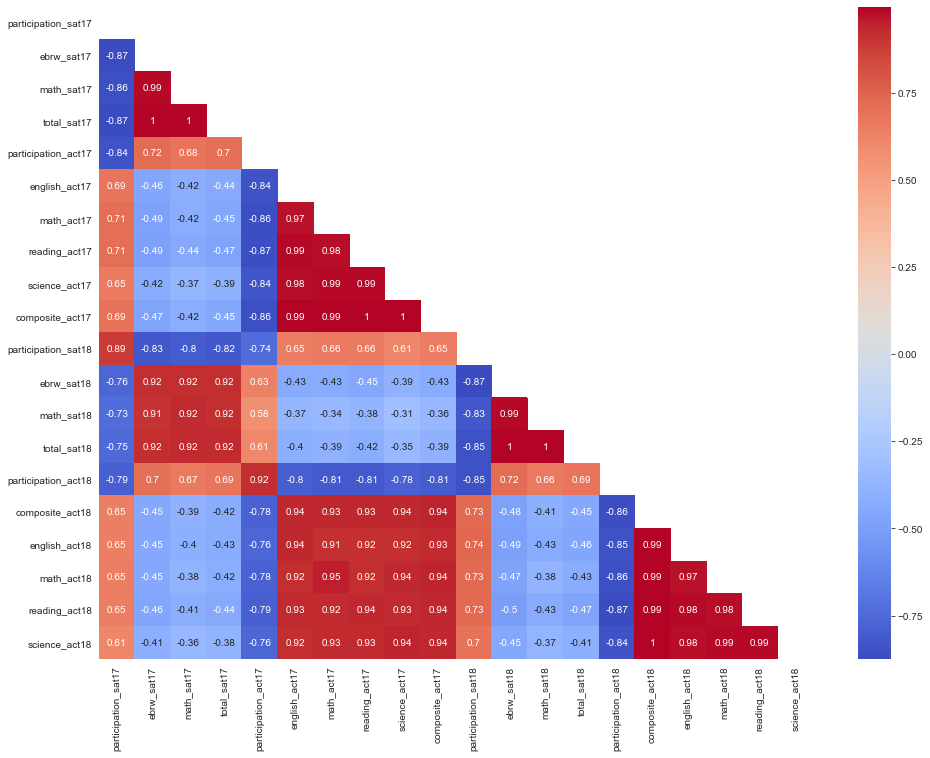

In [54]:
final_corr = final.corr()
plt.figure(figsize=(16,12))
sns.heatmap(final_corr, mask=np.triu(final_corr), cmap='coolwarm', annot=True)
plt.show()

#### Observations:
- **The Participation Rate for a test has a strong negative correlation to the Participation Rate of the other test.** (i.e. Participation Rate for SAT 2017 has a strong negative correlation to Participation Rate for ACT 2017 and 2018). This would agree with the reasoning that each state will "choose" one test as the state's college admissions test resulting in high participation rate in one and low admission in the other.

- **The Participation Rate for a test has a strong negative correlation to the mean scores of the test.** This is as observed earlier as well, where the higher the participation rate, the lower the mean scores achieved by the state.

- **Scores for a certain test in one year has a strong positive correlation to the scores of the same test the next year.** This shows that states generally perform similarly year-on-year.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
#Create a function clean_column_name to change the column names from 'ebrw_sat17' to more readable names such as 'EBRW SAT 2017'

def clean_column_name(list_of_columns):
    new_column = [column.capitalize().replace('_', ' ') for column in list_of_columns]
    for index, column in enumerate(new_column):
        if 'sat17' in column:
            new_column[index] = column.replace('sat17', 'SAT 2017')
        elif 'sat18' in column:
            new_column[index] = column.replace('sat18', 'SAT 2018')
        elif 'act17' in column:
            new_column[index] = column.replace('act17', 'ACT 2017')
        elif 'act18' in column:
            new_column[index] = column.replace('act18', 'ACT 2018')
    for index, column in enumerate(new_column):
        if 'Ebrw' in column:
            new_column[index] = column.replace('Ebrw', 'EBRW')
    return new_column

In [90]:
def subplot_histograms(dataframe, list_of_columns, xlabel, bins = 10, share_axis = False):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12, nrows*4), sharex=share_axis, sharey=share_axis) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    list_of_titles = clean_column_name(list_of_columns)
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = bins) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title('Histogram Plot of ' + list_of_titles[i], fontsize = 15)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel('Count')
        # Displays the line for the mean value of the histogram
        ax[i].axvline(dataframe[column].mean(), color='midnightblue', linestyle='dashed', linewidth=2)
        plt.tight_layout()

        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [57]:
participation = [column for column in final.columns if 'participation' in column]
math = [column for column in final.columns if 'math' in column]
reading = [column for column in final.columns if ('reading' in column or 'ebrw' in column)]
participation

['participation_sat17',
 'participation_act17',
 'participation_sat18',
 'participation_act18']

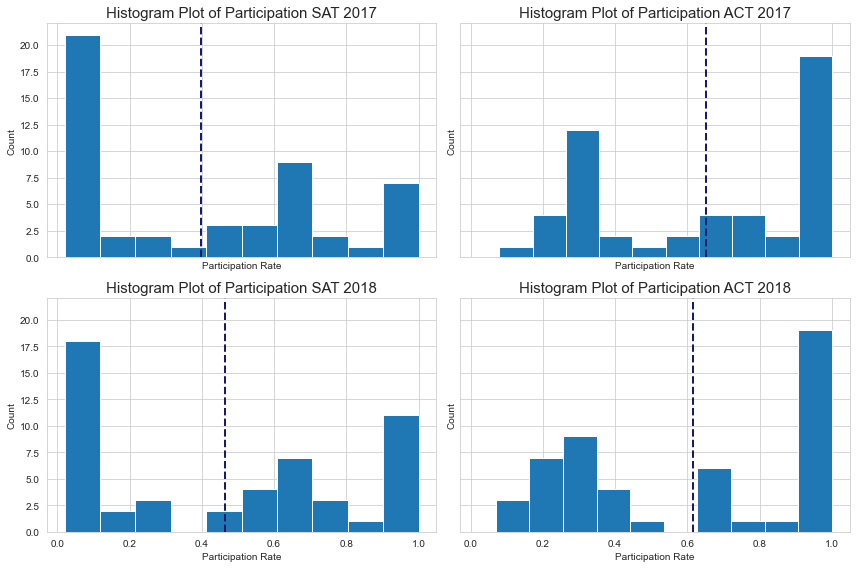

In [58]:
subplot_histograms(final, participation, 'Participation Rate', share_axis = True)

**ACT has a higher participation rate compared to SAT.** This can be observed as:
1. The mean of ACT participation rate for both years is more than 60% while the mean for SAT is less than 45%.
2. There are more states having 100% participation rate for ACT.
3. There are more states having close to 0% participation rate for SAT.

Apart from that, there is also an increase in the mean participation rate for SAT from 2017 to 2018. Correspondingly, there is a decrease in the mean participation rate for ACT from 2017 to 2018.

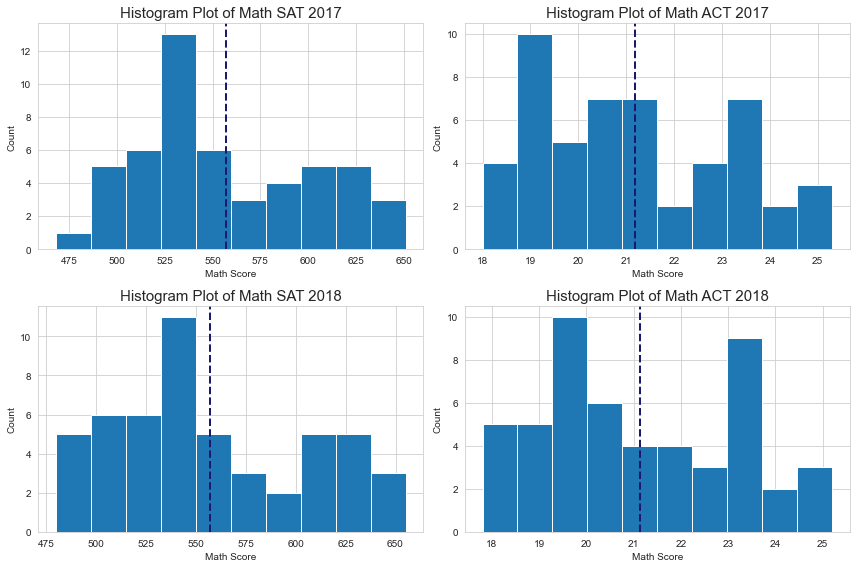

In [59]:
subplot_histograms(final, math, 'Math Score')

It is hard to compare the scores meaningfully as they are essentially different tests that are marked differently and graded on different scales. 

However, by comparing the shape, there seem to be a **greater number of states with average Math score below the mean for SAT** and a **greater number of states with average Math score above the mean for ACT**. 

This **may** suggest that it is easier to score better on the ACT math test or there is a higher probability of doing well on a ACT Math test.

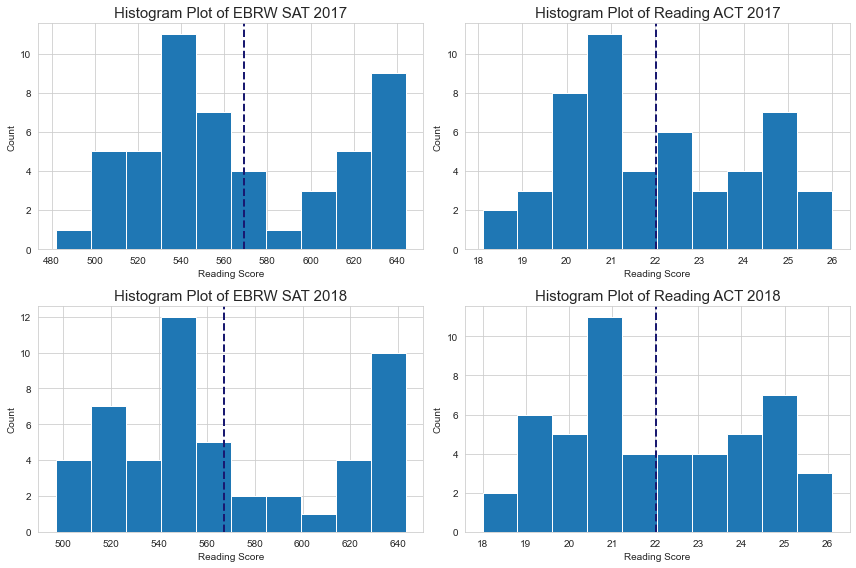

In [60]:
subplot_histograms(final, reading, 'Reading Score')

Again, it is hard to compare the scores meaningfully as they are essentially different tests that are marked differently and graded on different scales. 

However, just by comparing the shape, it can be observed that for the **SAT EBRW test score**, there are a **greater number of states having mean scores near the maximum mean score obtained** (640) while the ACT Reading test score does not have the same peak near the maximum mean score. 

This **may** suggest that it may be **easier to score better on the SAT EBRW test** as compared to ACT Reading test.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [91]:
# A list of list where the pair of x_var and y_var to be plotted using scatter plot is created.
pairs_for_scatterplot = [['math_act17', 'math_sat17'],
                     ['reading_act17', 'ebrw_sat17'],
                     ['composite_act17', 'total_sat17'],
                     ['total_sat18', 'total_sat17'],
                     ['composite_act18', 'composite_act17']]

In [96]:
# As a number of scatterplot will be done, defining a function to repeat the process will make the process faster.
# This function will take in a two strings of column headers contained in the final dataframe and plots the values of the two columns against each other.
def scatterplot(x_col, y_col, df=final, alpha = 0.5, c=None):
    plt.figure(figsize = (8,6))
    x_col_clean, y_col_clean = clean_column_name([x_col, y_col])
    sns.regplot(x=x_col, y=y_col, data = final)
    plt.title(f'Scatter Plot of {y_col_clean} VS {x_col_clean}', fontsize = 15)
    plt.xlabel(f'Score of {x_col_clean}')
    plt.ylabel(f'Score of {y_col_clean}')
    plt.show()

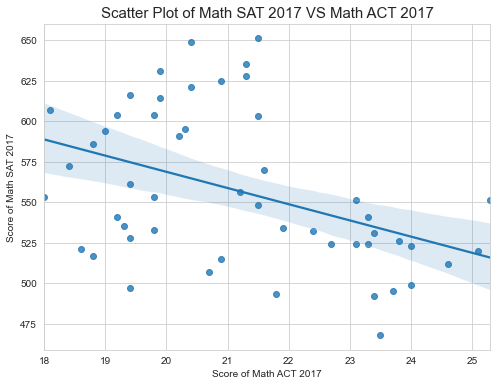

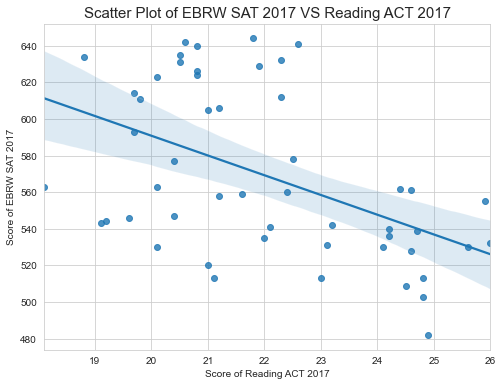

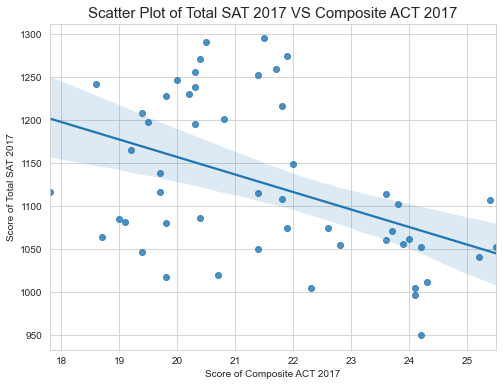

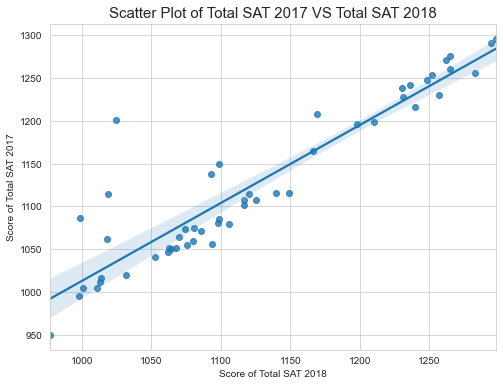

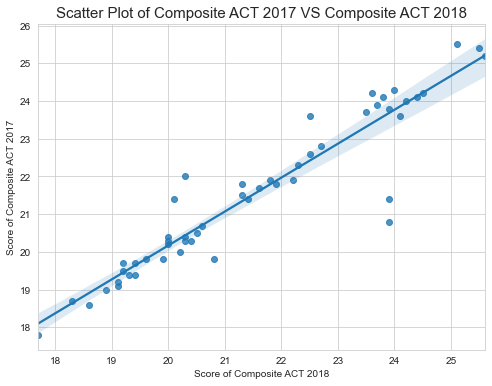

In [97]:
for col1, col2 in pairs_for_scatterplot:
    scatterplot(col1, col2)
    print('\n')

#### Observations
From the scatter plot for comparison between Math, Reading, Total/Composite of SAT vs ACT, it is observed that there is a **low negative correlation** between the corresponding scores for ACT and SAT.

On the other hand, the scatter plot of composite scores of ACT in 2017 and 2018 show that there is a **high positive correlations**. This is reasonable as states usually perform similarly year-on-year. 

The same trend is reflected in the scatter plot of total scores of SAT in 2017 and 2018, showing the **high positive correlations**. 

In [64]:
final.loc[(final['total_sat17']>1200) & (final['total_sat18']<1050),['state','participation_sat17','total_sat17','participation_sat18','total_sat18'] ]

,state,participation_sat17,total_sat17,participation_sat18,total_sat18
5,Colorado,0.11,1201,1.0,1025


However, it is observed that there are a outlier in this data - Colorado. Colorado obtained high mean total score in 2017 but much lower in 2018. This decrease in mean total score is likely due to the increase of participation rate from 11% to 100%. This will be further investigated in the later section.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [66]:
# Code
# This is to split the columns into lists whereby their values are in similar range/scale, to allow for better visualization of the boxplot

sat_section_columns = [column for column in final.columns if (('sat' in column) and ('total' not in column) and ('participation' not in column))]
sat_section_columns.sort()

sat_total_columns = [column for column in final.columns if (('sat' in column) and ('total' in column) and ('participation' not in column))]
sat_total_columns.sort()

act_columns = [column for column in final.columns if (('act' in column) and ('participation' not in column))]
act_columns.sort()

participation_columns = [column for column in final.columns if 'participation' in column]
participation_columns.sort()

In [67]:
def plot_box_plot(list_of_columns, title, orient = 'h'):
    clean_names = clean_column_name(list_of_columns)
    plt.figure(figsize = (12, 1.5*len(list_of_columns)))
    ax = sns.boxplot(data = final[list_of_columns], orient = orient)
    plt.yticks(np.arange(len(clean_names)),labels = clean_names)
    plt.title(title, fontsize = 15)
    plt.show()

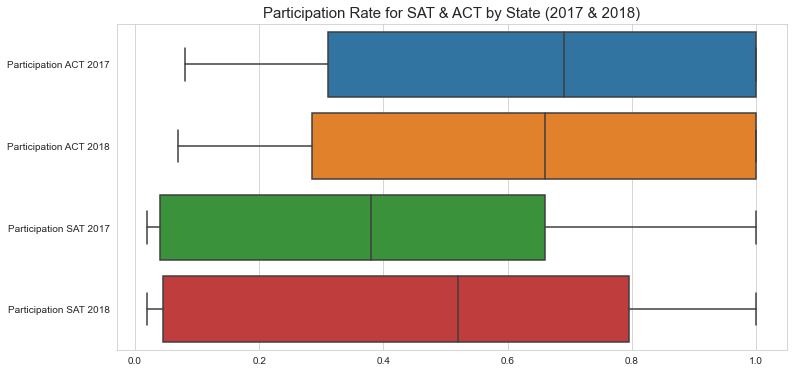

In [68]:
plot_box_plot(participation_columns, 'Participation Rate for SAT & ACT by State (2017 & 2018)', orient = 'h')

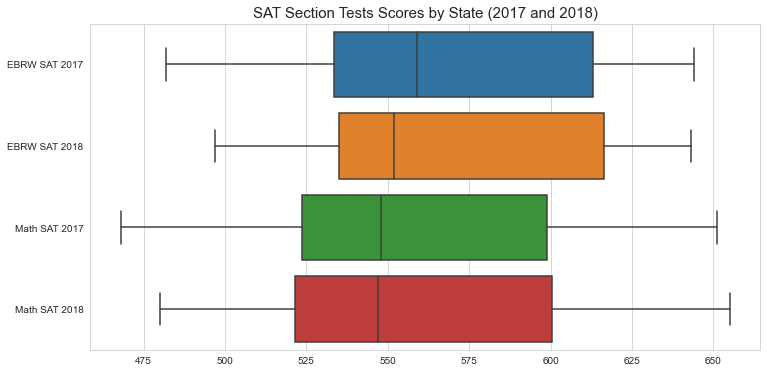

In [69]:
plot_box_plot(sat_section_columns, 'SAT Section Tests Scores by State (2017 and 2018)', orient = 'h')

#### Observations
For the EBRW test scores, they looks similar from 2017 to 2018.

For the Math test scores, while the lowerbound and upperbound scores increased, the 25th percentile, mean and 75th percentile score all decreased slightly from 2017 to 2018. 

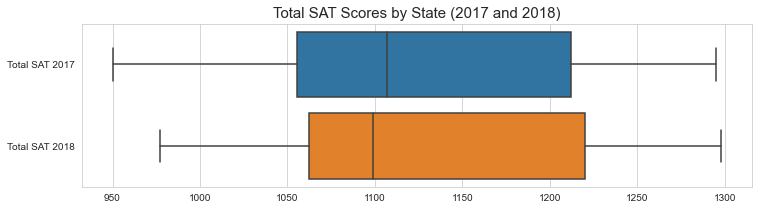

In [70]:
plot_box_plot(sat_total_columns, 'Total SAT Scores by State (2017 and 2018)', orient = 'h')

#### Observations
For the total SAT scores, the lowerbound, upperbound and 25th percentile scores increased while the mean and 75th percentile scores decreased from 2017 to 2018. 

This shows a similar trend to the SAT math scores and corresponds to an increase in the SAT participation rate. As previously suggested, as the participation rate increases, a decrease in the score should be expected. On the other hand, the increase in the lowerbound and 25th percentile scores **may** be due to moderation to encourage more students to take SAT.

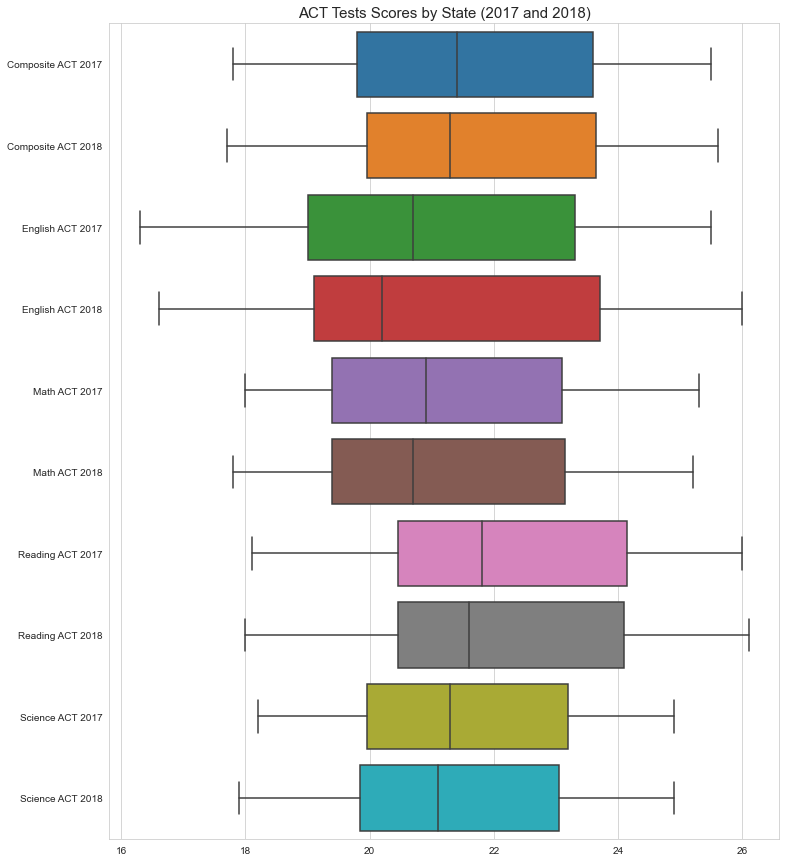

In [71]:
plot_box_plot(act_columns, 'ACT Tests Scores by State (2017 and 2018)', orient = 'h')

#### Observations
In general, for all the mean ACT section tests (Math, English, Reading, Science) scores, they follow a similar trend from 2017 to 2018, except that all of the mean have decreased slightly.

For the composite score in particular, the 25th percentile score increased slightly while the mean decreased slightly from 2017 to 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

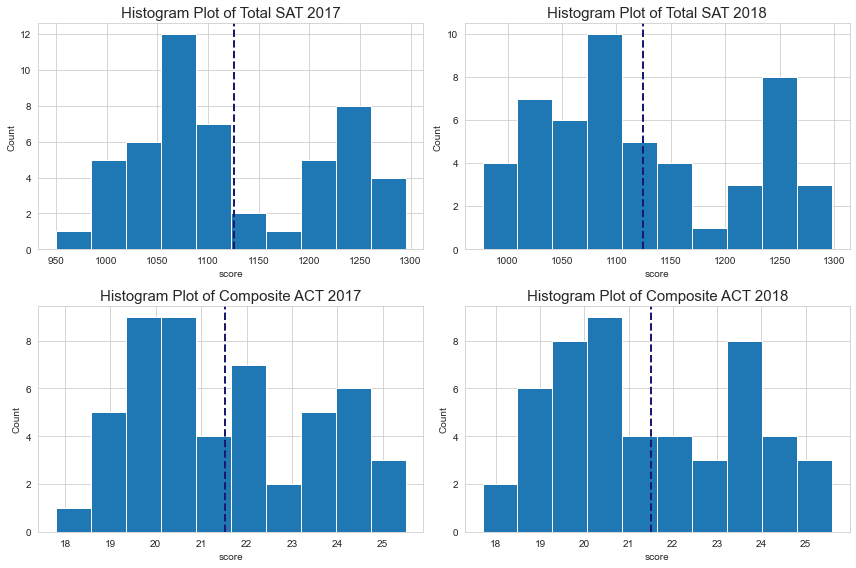

In [72]:
# Plotting the histogram of the total and composite scores to see the distributions

subplot_histograms(final, ['total_sat17', 'total_sat18','composite_act17',  'composite_act18'], 'score')

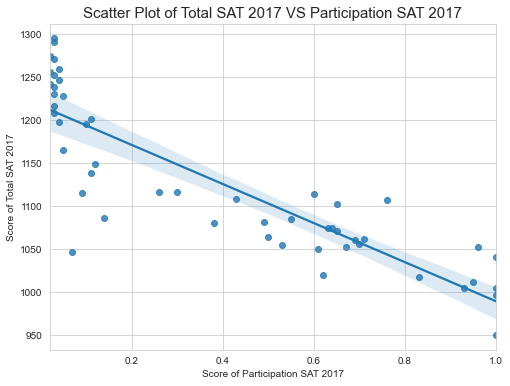

In [73]:
scatterplot('participation_sat17', 'total_sat17')

In [74]:
# To find the state that is responsible for the outlier data at bottom left
final[(final['participation_sat17']<0.1) & (final['total_sat17']<1100)][['state','participation_sat17','total_sat17']]

,state,participation_sat17,total_sat17
36,Oklahoma,0.07,1047


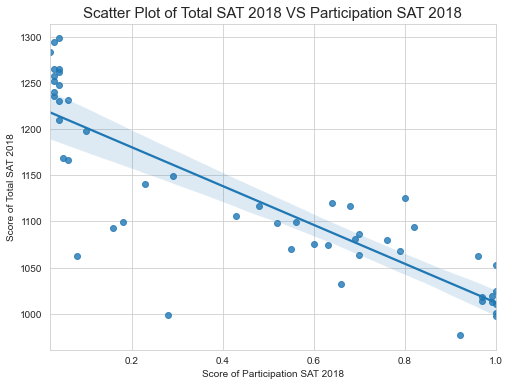

In [75]:
scatterplot('participation_sat18', 'total_sat18')

In [76]:
# To find the state that is responsible for the outlier data at bottom left
final[(final['participation_sat18']<0.1) & (final['total_sat18']<1100)][['state','participation_sat18','total_sat18']]

,state,participation_sat18,total_sat18
36,Oklahoma,0.08,1062


In [77]:
# To find the mean total SAT score for states with < 10% participation rate in 2017
sat_mean_less_than_10_participation_17 = final[(final['participation_sat17']<0.1)]['total_sat17'].mean()
print(f'2017 mean total SAT score for states with < 10% participation rate:{sat_mean_less_than_10_participation_17: .4g}')

2017 mean total SAT score for states with < 10% participation rate: 1224


In [78]:
# To find the mean total SAT score for states with < 10% participation rate in 2018
sat_mean_less_than_10_participation_18 = final[(final['participation_sat18']<0.1)]['total_sat18'].mean()
print(f'2018 mean total SAT score for states with < 10% participation rate:{sat_mean_less_than_10_participation_18: .4g}')

2018 mean total SAT score for states with < 10% participation rate: 1233


Above, a trend that was identified is that: states with **low participation rates** generally have **higher mean test scores**. This can also be observed fromm the negative correlation that can be seen from the two plots above.

However, **Oklahoma**, with **participation rate of 7% and 8%** in 2017 and 2018 respectively, **scored only 1047 and 1062** respectively, which is considered unusual compared to mean of states with similar participation rate (less than 10%) which had been 1224 and 1233 respectively for 2017 and 2018.

In [79]:
final[(final['state']=='Oklahoma')][['state','participation_sat17','total_sat17','participation_sat18','total_sat18','participation_act17','composite_act17','participation_act18','composite_act18']]

,state,participation_sat17,total_sat17,participation_sat18,total_sat18,participation_act17,composite_act17,participation_act18,composite_act18
36,Oklahoma,0.07,1047,0.08,1062,1.0,19.4,1.0,19.3


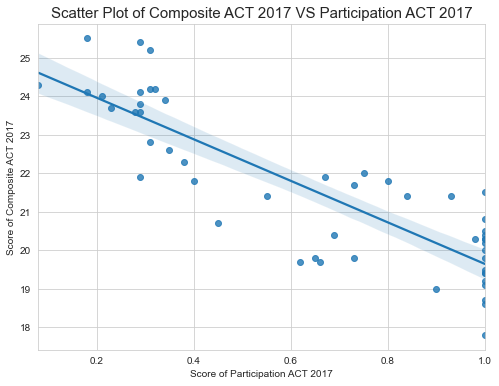

In [80]:
scatterplot('participation_act17', 'composite_act17')

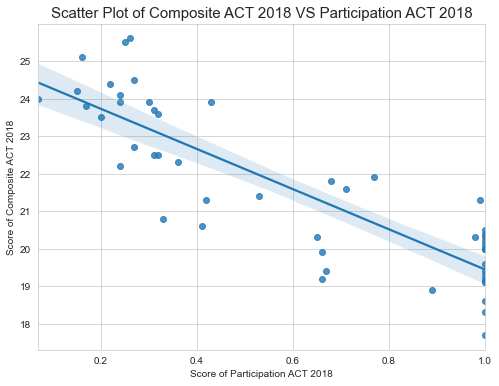

In [81]:
scatterplot('participation_act18', 'composite_act18')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [82]:
final[['state','participation_sat17', 'participation_sat18','total_sat17', 'total_sat18', 'participation_act17','participation_act18', 'composite_act17',  'composite_act18']].describe()

,participation_sat17,participation_sat18,total_sat17,total_sat18,participation_act17,participation_act18,composite_act17,composite_act18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,0.465490,1126.098039,1124.411765,0.652549,0.616471,21.519608,21.498039
std,0.352766,0.379754,92.494812,93.957688,0.321408,0.340810,2.020695,2.117686
min,0.020000,0.020000,950.000000,977.000000,0.080000,0.070000,17.800000,17.700000
25%,0.040000,0.045000,1055.500000,1062.500000,0.310000,0.285000,19.800000,19.950000
50%,0.380000,0.520000,1107.000000,1099.000000,0.690000,0.660000,21.400000,21.300000
75%,0.660000,0.795000,1212.000000,1220.000000,1.000000,1.000000,23.600000,23.650000
max,1.000000,1.000000,1295.000000,1298.000000,1.000000,1.000000,25.500000,25.600000


#### Answer:
For this portion, I will explore a few important variables in the dataset, namely **participation rates, total and composite scores**. The mean and std deviation of these values can be found in the table above.

1.**SAT Participation Rate**

The **SAT Participation Rate** looks like a combination of three distributions - 
1. a decreasing distribution (with peak at 0%), 
2. a normal distribution with center around 60% and 
3. an increasing distribution (with peak at 100%).

Other than that, there is an increase in the mean participation rate for SAT from 2017 to 2018.

\
\
2.**ACT Participation Rate**

On the other hand, the **ACT Participation Rate** looks like a combination of two distributions - 
1. a normal distribution with center 30% and std deviation around 10, and
2. a increasing distribution (with peak at 100%).

Other than that, there is a decrease in the mean participation rate for ACT from 2017 to 2018.

\
\
3. **Mean Total Score for SAT**

For the **Mean Total Score for SAT in 2017**, the distribution look like a combination of two distributions:
1. a normal distribution around 1050 with a std deviation around 100.
2. a normal distributiion around 1250 with a std deviation around 50.

While the **Mean Total Score for SAT in 2018** looks like a combination of three distributions: 
1. a normal distribution around 1100 with a std deviation around 50.
2. a normal distribution around 1250 with a std deviation around 25.
3. a random peak at around 1025.

It is observed that there is a decrease of the average Mean Total SAT Score from 1126 in 2017 to 1120 in 2018.

\
\
4. **Mean Total Score for ACT**

For the **Mean Total Score for ACT in 2017**, the distribution look like a combination of three distributions:
1. a normal distribution around 20 with a std deviation around 1.
2. a normal distributiion around 24 with a std deviation less than 1.
3. a peak at 22.

While the **Mean Total Score for ACT in 2018** looks like a combination of two distributions: 
1. a normal distribution around 24 with a std deviation around 1.
2. a unknown distribution shape for scores less than 20.

It is also observed that there is a very slight decrease of the average Mean Composite ACT Score from 21.52 in 2017 to 21.50 in 2018.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assume that data we sample from a population will be normally distributed. Do we observe this trend?***

#### Answer:
No, from the 8 variables we explored above, **none of them showed a true normally distributed result**.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

#### Answer:
With reference to the histograms plotted above:
1. **Math**: 
The assumption that the data sampled will be normally distributed does not hold as the histogram does not exhibit the shape of a normal distribution. This is because the sample data (state mean of ACT/SAT math test) obtained is affected by participation rate of the state (there exists a strong negative correlation), as explored earlier. It is not a good representation of the population mean. 

2. **Reading**:
The assumption that the data sampled will be normally distributed does not hold as the histogram does not exhibit the shape of a normal distribution. This is because the sample data (state mean of ACT/SAT reading test) obtained is affected by participation rate of the state (there exists a strong negative correlation), as explored earlier. It is not a good representation of the population mean. 

3. **Participation Rates**:
The assumption that the data sampled will be normally distributed does not hold as the histogram does not exhibit the shape of a normal distribution. This is because the sample data (state participation rate of ACT/SAT test) obtained is likely affected by the state's policies, as explored earlier. It is not a good representation of the population mean. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describes when answering this question)*

#### Answer:
Taking a look at the 2017 SAT participation rate:
- Population: Whether each eligible student take the test
- Population mean: The national average participation rate
- Sample: The state average participation rate. We have 51 samples.

We should note that **the states do not have the same population** and hence should not be given equal weight in determining the overall US participation rate. 

As an example, suppose the country XYZ has only two states: State A and State B. The participation rate for SAT in State A is 100% while the participation rate of State B is 50%. If we were to infer from these two states, we will calculate a inferred mean participation rate for the country XYZ of 75% (100% + 50% /2). 

However, State A has 10 people living in it, and State B has 2000 people living in it. This would mean, in fact, that State A has 10 people participating and State B has 1000 people participating. This will be a total of 1010 people participating out of the 2010 total population, which is a true population mean of 50.2% participating rate, which is extremely far from the 75% if calculated.

Hence, with **only the participation rate and not the total population eligible for the tests**, it **does not make sense** to conduct statistic inference on the participation rates. This in fact applies to all variables in this dataset.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

#### Answer:
It is hard to tell from the data as the scores we see are affected by participation rate. However, logically speaking, it is unlikely that we can compare these SAT and ACT math scores because:
1. While they are both Math tests, these tests will like have different contents. Hence, someone may perform badly on one test and much better on another simply because the person has better knowledge on a certain area of the content.
2. If there is moderations for these tests, if a person is tested in a year with more people who are performing badly, then the person's score may be artificially moderated higher than it should be.


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [83]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

#### 1. Oklahoma
Despite having a participation rate of 7% and 8% in 2017 and 2018 respectively, Oklahoma scored only 1047 and 1062 on the mean total SAT scores, much lower than 1224 and 1233 - the average mean SAT score of all states with similar participation rate (less than 10%).

In the face of declining oil revenue, spending on education in Oklahoma has declined further than anywhere else. By 2017, **Oklahoma's education spending per student** (inflation adjusted) **was 28.2% less than it was in 2008**. The reduction of education spending affected public funded schools heavily and caused massive impact of the education systems:
- **Persistent educator shortage** — 30,000 teachers had left the profession between 2013 to 2019 due to the low salary ("pay so low that many had to take several jobs to pay their bills") and there is insufficient new educators to meet the need of the state. 
- **Falling qualification/conditions of educators** - As a result of the shortage of educators, it led to undesired measures such as relaxing qualification requirements during hiring and increasing the workload of educators who remain in the classroom. Furthermore, many educators had to take several jobs to pay their bills, teachers come into classes tired and are not in the best condition to teach. 
- **Insufficient resources/budget** - 207 out of 1,820 publicly funded school had moved to four-day weeks by 2018 to save money on buses, electricity and support staff. 
- **Low morale of educators** - There is plummeting morale among public school teachers, who feel they have been blamed by policymakers for low student achievement.

#### 2. Colorado
In the analysis above, Colorado has been identified to have had an increase in SAT participation from 11% to 100% from 2017 to 2018. The reason for this huge change was due to the Colorado Department of Education’s Decision to switch to the revamped SAT for assessment in 2018 as part of high school accountability. This decision mandated the SAT which resulted in the steep increase in SAT participation rate in Colorado.

#### 3. Illinois
In the analysis above, Illinois was also identified to have had an increase in SAT participation from 9% to 99% from 2017 to 2018. The reason for this huge change was due to the Illinois State Board of Education's decision to switch to the revamped SAT for assessment in 2018 to meet the Every Student Succeeds Act (ESSA), which was signed into law in 2015.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Takeaways
From looking at and exploring the relationships between the variables within these datasets, many interesting relationships between the different variables were found. Some notable findings are listed below:
1. Most states will favour only 1 test, resulting in high participation rate in one and low participation rate in another.
2. There are a greater number of states have high participation rate for ACT as compared to SAT.
3. As participation rate increases, the mean scores achieved by the state drops.

In [84]:
low_sat_participation_mask = (final['participation_sat17'] < .5) & (final['participation_sat18'] < .5) & (final['participation_act17'] != 1)
low_sat_participation_df = final[low_sat_participation_mask]

low_sat_participation_df[['state','participation_sat17','participation_sat18','participation_act17','participation_act18']].sort_values('participation_sat18')

,state,participation_sat17,participation_sat18,participation_act17,participation_act18
34,North Dakota,0.02,0.02,0.98,0.98
15,Iowa,0.02,0.03,0.67,0.68
27,Nebraska,0.03,0.03,0.84,1.00
41,South Dakota,0.03,0.03,0.80,0.77
16,Kansas,0.04,0.04,0.73,0.71
31,New Mexico,0.11,0.16,0.66,0.67
35,Ohio,0.12,0.18,0.75,1.00
48,West Virginia,0.14,0.28,0.69,0.65
2,Arizona,0.30,0.29,0.62,0.66
1,Alaska,0.38,0.43,0.65,0.33


### Recommendations
College Board is the American not-for-profit organization that develops and adminsters the SAT and SAT subject tests. Below are some recommendations/suggestions targetted to improve the SAT participation rate.

College Board should target the states with low SAT participation rates in both 2017 and 2018, states where these suggestions could be useful will be states such as **Iowa** (and others including: Kansas, New Mexicom, West Virginia, Arizona, Alaska, Oregon). The reason to target these states is that while these states have **low SAT participation rates**, their **ACT participation rate is not too high either**, probably signifying that there is **no state policy mandating any specific college admissions test**, therefore making them excellent locations to work to improve SAT participration rate.

In [85]:
sat_school_day_states = ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Illinois', 'Maine', 'Michigan', 'New Hampshire', 'Rhode Island', 'District of Columbia']

sat_school_day_states_df = final[final['state'].isin(sat_school_day_states)][['state','participation_sat17', 'participation_sat18']]
sat_school_day_states_df

,state,participation_sat17,participation_sat18
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
13,Illinois,0.09,0.99
19,Maine,0.95,0.99
22,Michigan,1.00,1.00
29,New Hampshire,0.96,0.96
39,Rhode Island,0.71,0.97


In [86]:
sat_school_day_states_df.describe()

,participation_sat17,participation_sat18
count,10.000000,10.000000
mean,0.775000,0.983000
std,0.366219,0.026268
min,0.090000,0.920000
25%,0.765000,0.975000
50%,0.955000,0.995000
75%,1.000000,1.000000
max,1.000000,1.000000


In [87]:
final[['participation_sat17', 'participation_sat18']].describe()

,participation_sat17,participation_sat18
count,51.000000,51.000000
mean,0.398039,0.465490
std,0.352766,0.379754
min,0.020000,0.020000
25%,0.040000,0.045000
50%,0.380000,0.520000
75%,0.660000,0.795000
max,1.000000,1.000000


#### SAT School Day
One way that has been proven effective is to carry out an initiative known as **SAT School Day**. This initiative provides schools, districts and sstates a way to offer SAT to graduating students in school, on a weekday. There are 2 main key benefits to this:
1. This will make it vastly more convenient for students to take the SAT.
- Having the SAT in the school allow students to be in a familiar setting.
- Having it on a weekday ensures that it will not disrupt weekend jobs, plans or family time.
2. Low-income students can get access to certain fee waiver benefits.

From the above analysis, the mean participation rate for states with SAT School Day is much higher than the mean participation rate for all states

#### SAT Marketing
Apart from SAT School Day, the college board could promote the SAT better. After the SAT's revamp in 2016, there are a few key differences between SAT and ACT that may be attractive to draw students to take the SAT:
1. Eliminated obscure vocabulary words - Instead of testing students on words they will be unlikely to use, the new SAT tests students to define a word based on how they are used in context. 
2. Dropped the penalty for wrong answers - Students do not have to waste time trying to guess answers they are not sure about.
3. More time to answer for each question - It will be less intensive and taxing on the student.